# HW06

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import scipy.stats as stats
import math

## Parameters

In [2]:
np.random.seed(421)

# cluster count
K = 5


# mean parameters
class_means = np.array([[+2.5, +2.5], 
                        [-2.5, +2.5], 
                        [-2.5, -2.5],
                        [+2.5, -2.5],
                        [+0.0, +0.0]])
# covariance parameters
class_covariances = np.array([[[+0.8, -0.6], 
                               [-0.6, +0.8]],
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]],
                              [[+0.8, -0.6], 
                               [-0.6, +0.8]],
                              [[+0.8, +0.6], 
                               [+0.6, +0.8]],
                              [[+1.6, +0.0], 
                               [+0.0, +1.6]]])
# sample sizes
class_sizes = np.array([50, 50, 50, 50, 100])
N = 300

## Data Generation

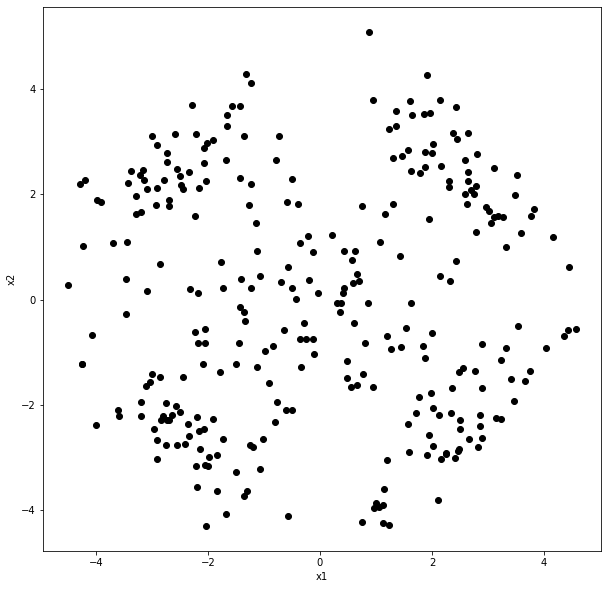

In [3]:
# generate random samples
points1 = np.random.multivariate_normal(class_means[0,:], class_covariances[0,:,:], class_sizes[0])
points2 = np.random.multivariate_normal(class_means[1,:], class_covariances[1,:,:], class_sizes[1])
points3 = np.random.multivariate_normal(class_means[2,:], class_covariances[2,:,:], class_sizes[2])
points4 = np.random.multivariate_normal(class_means[3,:], class_covariances[3,:,:], class_sizes[3])
points5 = np.random.multivariate_normal(class_means[4,:], class_covariances[4,:,:], class_sizes[4])
X = np.concatenate((points1, points2, points3, points4, points5))

plt.figure(figsize = (10, 10))
plt.scatter(points1[:,0], points1[:,1], color="black")
plt.scatter(points2[:,0], points2[:,1], color="black")
plt.scatter(points3[:,0], points3[:,1], color="black")
plt.scatter(points4[:,0], points4[:,1], color="black")
plt.scatter(points5[:,0], points5[:,1], color="black")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


## Algorithm Steps

In [4]:
def update_centroids(memberships, X):
    if memberships is None:
        # initialize centroids
        centroids = X[np.random.choice(range(N), K),:]
    else:
        # update centroids
        centroids = np.vstack([np.mean(X[memberships == k,], axis = 0) for k in range(K)])
    return(centroids)

def update_memberships(centroids, X):
    # calculate distances between centroids and data points
    D = spa.distance_matrix(centroids, X)
    # find the nearest centroid for each data point
    memberships = np.argmin(D, axis = 0)
    return(memberships)

## Visualization

In [5]:
def plot_current_state(centroids, memberships, X):
    cluster_colors = np.array(["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"])
    cluster_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#b15928",
                               "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6", "#ffff99"])
    if memberships is None:
        plt.plot(X[:,0], X[:,1], ".", markersize = 10, color = "black")
    else:
        for c in range(K):
            plt.plot(X[memberships == c, 0], X[memberships == c, 1], ".", markersize = 10, 
                     color = cluster_colors[c])
    for c in range(K):
        plt.plot(centroids[c, 0], centroids[c, 1], "s", markersize = 12, 
                 markerfacecolor = cluster_colors[c], markeredgecolor = "black")
    plt.xlabel("x1")
    plt.ylabel("x2")

## Iterations

Iteration#1:


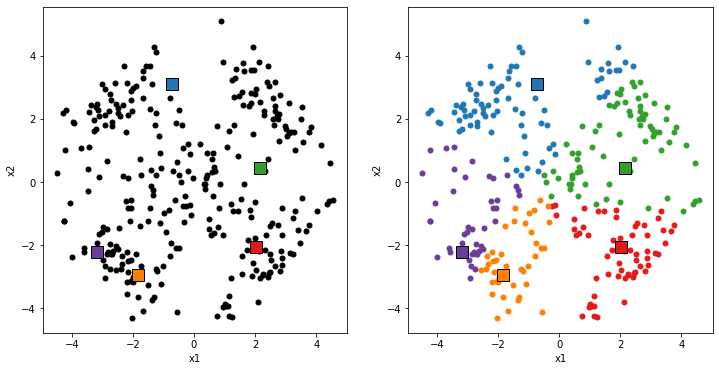

[[-0.72448243  3.11594719]
 [ 2.15067196  0.43893571]
 [ 2.01250253 -2.06593643]
 [-1.8293349  -2.95685596]
 [-3.18772687 -2.20425841]]


In [6]:
centroids = None
memberships = None
iteration = 1
while iteration!=2:
    print("Iteration#{}:".format(iteration))

    old_centroids = centroids
    centroids = update_centroids(memberships, X)
    if np.alltrue(centroids == old_centroids):
        break
    else:
        plt.figure(figsize = (12, 6))    
        plt.subplot(1, 2, 1)
        plot_current_state(centroids, memberships, X)

    old_memberships = memberships
    memberships = update_memberships(centroids, X)
    if np.alltrue(memberships == old_memberships):
        plt.show()
        break
    else:
        plt.subplot(1, 2, 2)
        plot_current_state(centroids, memberships, X)
        plt.show()

    iteration = iteration + 1
print(centroids)

# Parameter Initialize

In [7]:
y = np.concatenate((np.repeat(1, class_sizes[0]), np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2]), np.repeat(4, class_sizes[3]), np.repeat(5, class_sizes[4])))

sample_covariances= [(np.matmul(np.transpose(X[memberships == (c + 1)]-centroids[c]),(X[memberships == (c + 1)] - centroids[c])))/class_sizes[c] for c in range(K)]
class_priors = [np.mean(memberships == (c + 1)) for c in range(K)]
sample_means = centroids


# EM Algorithm

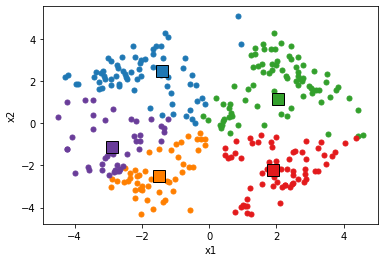

In [8]:

def gaussian(i,c):
    print(np.linalg.det(sample_covariances[c]))
    part1 = 1/(2*pi*math.pow(np.linalg.det(sample_covariances[c]),0.5))
    part2_1 = np.transpose(X[i]-sample_means[c])
    part2_2 = np.linalg.pinv(sample_covariances[c])
    part2_3 = X[i]-sample_means[c]
    
    a= np.matmul(part2_1,part2_2)
    part2= np.matmul(a,part2_3)
    part3 = math.exp(-0.5*part2)

scores=[]
for i in range(300):
    for c in range(K):
        #scores.append(gaussian(i,c))
        
        pass
       

    
    
    
    
    
    

old_centroids = centroids
centroids = update_centroids(memberships, X)
old_memberships = memberships
memberships = update_memberships(centroids, X)
plot_current_state(centroids, memberships, X)